In [1]:
import numpy as np
import pandas as pd

In [2]:
 df = pd.read_csv('placement-2.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# Steps
<ol>
    <li><h4>Preprocess + EDA + Feature Selection:</h4></li>
    <li><h4>Extract input and output columns</h4></li>
    <li><h4>Scale the values</h4></li>
    <li><h4>Train test split</h4></li>
    <li><h4>Train the model</h4></li>
    <li><h4>Evaluate the model/model selection</h4></li>
    <li><h4>Deploy the model</h4></li>
</ol>

## Step 1: We have toy dataset so, it is very clean so far. 
#### However, we dont need the unnamed column so in feature selection we will remove that columns

In [4]:
df = df.iloc[:, 1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.shape

(100, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [8]:
import matplotlib.pyplot as plt

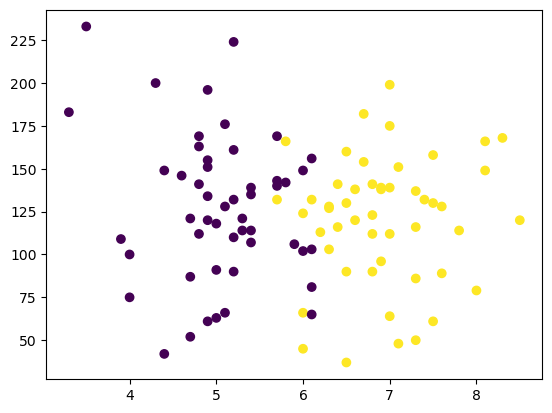

In [9]:
plt.scatter(df.iloc[:,0],df.iloc[:, 1], c=df.iloc[:, 2])

### We are going to use logistic regression.

## Step 2: Extract the input and output columns
#### We will take independent columns in input and dependent column in output.

In [10]:
X = df.iloc[:, :2] # 2D Tensor

In [11]:
y = df.iloc[:, -1] # 1D Tensor

## Train and Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Step 3: Scale the data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scalar = StandardScaler()

In [16]:
X_train = scalar.fit_transform(X_train)

In [17]:
X_test = scalar.transform(X_test)

# here we use transform instead of fit_transform, because we have fir the data while tranforming training data

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf = LogisticRegression()

In [20]:
# Traing the model
clf.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, y_pred)

0.9

In [24]:
# plot decision boundary
from mlxtend.plotting import plot_decision_regions

<Axes: >

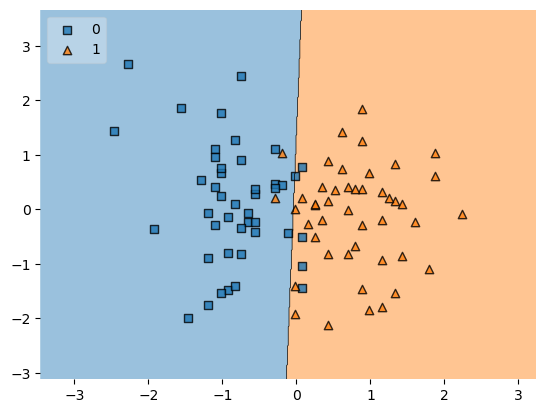

In [26]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [27]:
import pickle

In [28]:
pickle.dump(clf, open('model.pkl', 'wb'))